<a href="https://colab.research.google.com/github/Manoj-312002/Python/blob/master/house/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import norm 
from scipy import stats 
plt.style.use('seaborn-dark')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%cd /content
!git clone https://github.com/Manoj-312002/Python.git 
%cd Python/house

/content
Cloning into 'Python'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 86 (delta 27), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (86/86), done.
/content/Python/house


In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.drop(['Id'],axis=1)
print(train.shape)
train.dtypes.value_counts()

(1460, 80)


object     43
int64      34
float64     3
dtype: int64

In [36]:
obj = train.select_dtypes(include='object')
integer = train.select_dtypes(include='int64')
flo = train.select_dtypes(include='float64')
flo.head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


skew 1.8828757597682129 kurtosis 6.536281860064529
skew 0.12134661989685333 kurtosis 0.809519155707878


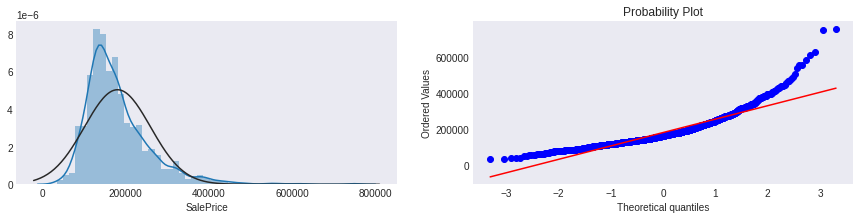

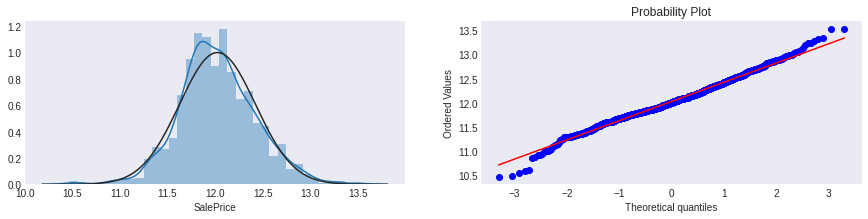

In [6]:
def disp_norm(data):
    print('skew {} kurtosis {}'.format(data.skew(),data.kurt()))
    #norm.fit(data)    # would give mean and std 
    plt.figure(figsize=(15,3))

    plt.subplot(1,2,1)
    sns.distplot(data,fit=norm)
    plt.subplot(1,2,2)
    stats.probplot(data,plot = plt)

disp_norm(train['SalePrice'])
train['SalePrice'] = np.log1p(train['SalePrice'])
disp_norm(train['SalePrice'])


In [7]:
integer.shape,flo.shape 

((1460, 34), (1460, 3))

In [8]:
a = train.columns 
b = pd.MultiIndex.from_arrays([train.dtypes.values,a])
train.columns = b
train.head()
train.sort_index(axis=1)

int64                     ...   object                 
     1stFlrSF 2ndFlrSF 3SsnPorch  ... SaleType Street Utilities
0         856      854         0  ...       WD   Pave    AllPub
1        1262        0         0  ...       WD   Pave    AllPub
2         920      866         0  ...       WD   Pave    AllPub
3         961      756         0  ...       WD   Pave    AllPub
4        1145     1053         0  ...       WD   Pave    AllPub
...       ...      ...       ...  ...      ...    ...       ...
1455      953      694         0  ...       WD   Pave    AllPub
1456     2073        0         0  ...       WD   Pave    AllPub
1457     1188     1152         0  ...       WD   Pave    AllPub
1458     1078        0         0  ...       WD   Pave    AllPub
1459     1256        0         0  ...       WD   Pave    AllPub

[1460 rows x 80 columns]

In [0]:


def box_graphs(data,a,b,c,d):
    fig = plt.figure(figsize=(c,d))
    l = len(data.columns)
    i = 1
    b = b*2
    while i < l*2:
        plt.subplot(a,b,i)
        sns.boxplot(y=data.iloc[:,i % l])
        i+=1

        plt.subplot(a,b,i)
        plt.scatter(data.iloc[:,i % l],integer['SalePrice'],color=('deepskyblue'),alpha =0.2)
        i+=1
    plt.show()

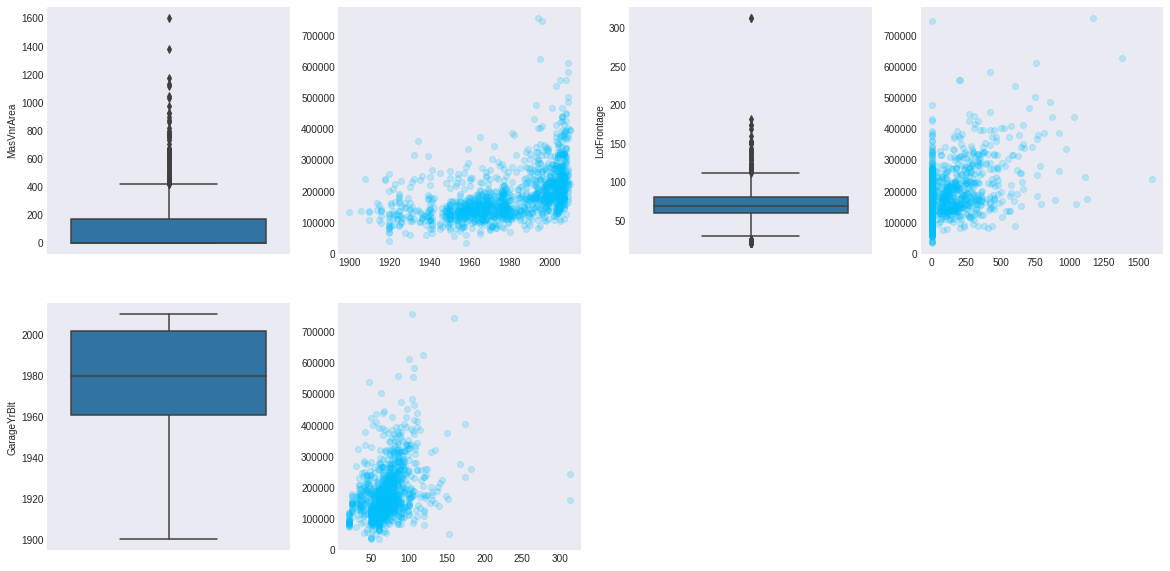

In [33]:
box_graphs(flo,2,2,20,10)

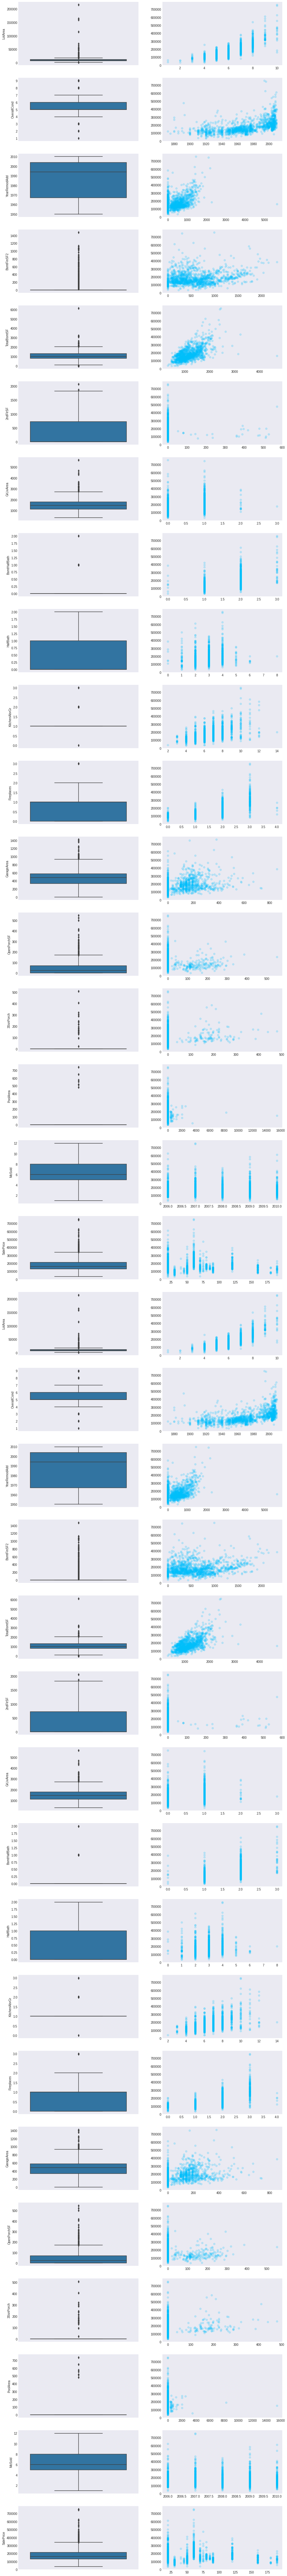

In [34]:
box_graphs(integer,34,1,15,150)

In [35]:
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

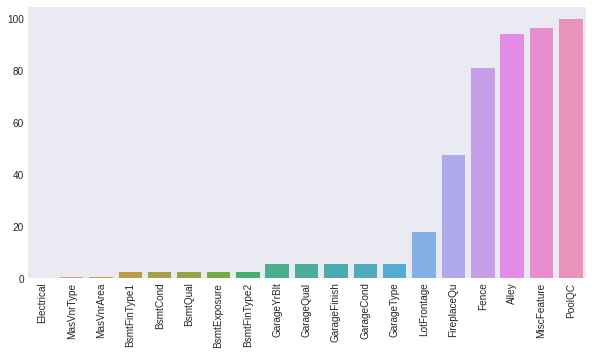

In [50]:
na = train.isna().sum().sort_values(ascending =True)
plt.figure(figsize=(10,5))
na = ((na/len(train))*100)[(na.values/len(train))*100 > 0]
sns.barplot(x =na.index,y = na.values)
plt.xticks(rotation = 90)
plt.show()

In [51]:
train[na.index].dtypes

Electrical       object
MasVnrType       object
MasVnrArea      float64
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
BsmtExposure     object
BsmtFinType2     object
GarageYrBlt     float64
GarageQual       object
GarageFinish     object
GarageCond       object
GarageType       object
LotFrontage     float64
FireplaceQu      object
Fence            object
Alley            object
MiscFeature      object
PoolQC           object
dtype: object